In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import ssl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import pingouin as pg

sns.set(rc={'figure.figsize':(20, 10)})
warnings.filterwarnings("ignore")
%matplotlib inline
SEED = 23

In [2]:
dict_group = {
    'num_inf': 'morphological',
     'num_cl': 'syntactic',
     'ndw': 'lexical',
     'corrected_vv': 'lexical',
     'corrected_ttr': 'lexical',
     'lfp_rest': 'lexical',
     'lfp_1000': 'lexical',
     'num_tok': 'syntactic',
     'num_compl_tu': 'syntactic',
     'num_noun_inf': 'syntactic',
     'num_tu': 'syntactic',
     'num_advcl': 'syntactic',
     'num_linkings': 'discursive',
     'num_shell_noun': 'discursive',
     'num_sent': 'syntactic',
     'num_adj_noun': 'syntactic',
     'density': 'lexical',
     'num_4grams': 'discursive',
     'nv': 'lexical',
     'num_rel_cl': 'syntactic',
     'num_coord': 'syntactic',
     'num_func_ngrams': 'discursive',
     'vvii': 'lexical',
     'num_gerunds': 'morphological',
     'lfp_2000': 'lexical',
     'ls': 'lexical',
     'sum_punct': 'l1_interference',
     'num_pres_sing': 'morphological',
     'min_depth': 'syntactic',
     'max_depth': 'syntactic',
     'der_level5': 'morphological',
     'freq_finite_forms': 'morphological',
     'million_mistake': 'l1_interference',
     'lfp_uwl': 'lexical',
     'num_acl': 'syntactic',
     'corrected_vs': 'lexical',
     'num_prep': 'syntactic',
     'der_level6': 'morphological',
     'der_level3': 'morphological',
     'av_tok_before_root': 'syntactic',
     'num_past_simple': 'morphological',
     'num_misspelled_tokens': 'l1_interference',
     'av_len_sent': 'syntactic',
     'lv': 'lexical',
     'num_part_noun': 'syntactic',
     'mci': 'morphological',
     'pos_sim_nei': 'syntactic',
     'freq_aux': 'morphological',
     'adjv': 'lexical',
     'pos_sim_all': 'syntactic',
     'der_level4': 'morphological',
     'num_pres_plur': 'morphological',
     'advv': 'lexical',
    'lemma_sim_nei': 'syntactic',
    'modv': 'lexical',
    'av_depth': 'syntactic',
    'num_past_part': 'morphological',
    'num_poss': 'syntactic',
    'lemma_sim_all': 'syntactic'
}

In [8]:
df = pd.read_csv('/Users/ira/Downloads/REALEC_Inspector/data/part_experiment_result.csv')
df['class'] = round(df['class'] / 10).astype(int)
df = df[df['class'] != 1]
df = df.drop(['name', 'text', 'side_mistake', 'type',
              'vs', 'squared_vs', 'ttr', 'root_ttr',
              'log_ttr', 'uber_ttr', 'd', 'vvi',
              'squared_vv', 'punct_mistakes_pp',
              'punct_mistakes_because', 'class',
              'punct_mistakes_but', 'punct_mistakes_compare'], axis=1)

df.head(2)

,av_depth,max_depth,min_depth,num_acl,num_rel_cl,num_advcl,num_sent,num_tok,av_tok_before_root,av_len_sent,...,num_pres_plur,num_past_part,num_past_simple,num_linkings,num_4grams,num_func_ngrams,num_shell_noun,num_misspelled_tokens,million_mistake,part
0,4.111111,6,2,2,0,1,9,150,5.444444,16.666667,...,0,2,0,4,0,0,0,2,0,0
1,3.000000,4,2,0,0,0,9,94,3.333333,10.444444,...,0,0,0,1,1,0,0,1,0,1


In [9]:
def get_info(feature, df):
    mean_1 = round(np.mean(df[df['part'] == 0][feature].to_list()), 3)
    mean_2 = round(np.mean(df[df['part'] == 1][feature].to_list()), 3)
    one_way_anova = pg.anova(data=df, dv=feature, between='part', detailed=True)
    p_value = one_way_anova['p-unc'][0]
    F = one_way_anova['F'][0]
    np2 = one_way_anova['np2'][0]
    return round(p_value, 3), round(F, 3), round(np2, 3), mean_1, mean_2

In [10]:
p_values = []
Fs = []
np2s = []
mean_1s = []
mean_2s = []
groups = []
features = [x for x in df.columns if x != 'part']
for f in features:
    p_value, F, np2, mean_1, mean_2 = get_info(f, df)
    p_values.append(p_value)
    Fs.append(F)
    np2s.append(np2)
    mean_1s.append(mean_1)
    mean_2s.append(mean_2)
    groups.append(dict_group[f])
f_df_anova = pd.DataFrame(data={'F-value': Fs,
                                'p-value': p_values,
                                'partial eta-square': np2s,
                                'feature': features,
                                'first part': mean_1s,
                               'second part': mean_2s,
                               'group': groups})
f_df_anova = f_df_anova.sort_values(['F-value', 'partial eta-square'], ascending=[0, 0])
f_df_anova = f_df_anova.set_index('feature')

# No difference

In [11]:
no_diff = f_df_anova[f_df_anova['p-value'] >= 0.05]
no_diff.head()

,F-value,p-value,partial eta-square,first part,second part,group
feature,,,,,,
av_depth,2.993,0.084,0.0,4.640,4.685,syntactic
corrected_vs,2.388,0.122,0.0,0.233,0.224,lexical
lfp_1000,1.613,0.204,0.0,0.672,0.670,lexical
der_level5,1.129,0.288,0.0,0.055,0.054,morphological
num_noun_inf,1.091,0.296,0.0,0.903,0.872,syntactic


In [13]:
no_diff_graph = no_diff
no_diff_graph['feature'] = no_diff_graph.index
no_diff_graph = no_diff_graph[['first part', 'second part', "feature"]]
no_diff_graph = pd.melt(no_diff_graph, id_vars="feature", var_name="part", value_name="mean")
no_diff_graph

,feature,part,mean
0,av_depth,first part,4.640
1,corrected_vs,first part,0.233
2,lfp_1000,first part,0.672
3,der_level5,first part,0.055
4,num_noun_inf,first part,0.903
5,num_advcl,first part,2.380
6,num_past_simple,first part,1.997
7,lfp_rest,first part,0.196
8,av_depth,second part,4.685
9,corrected_vs,second part,0.224


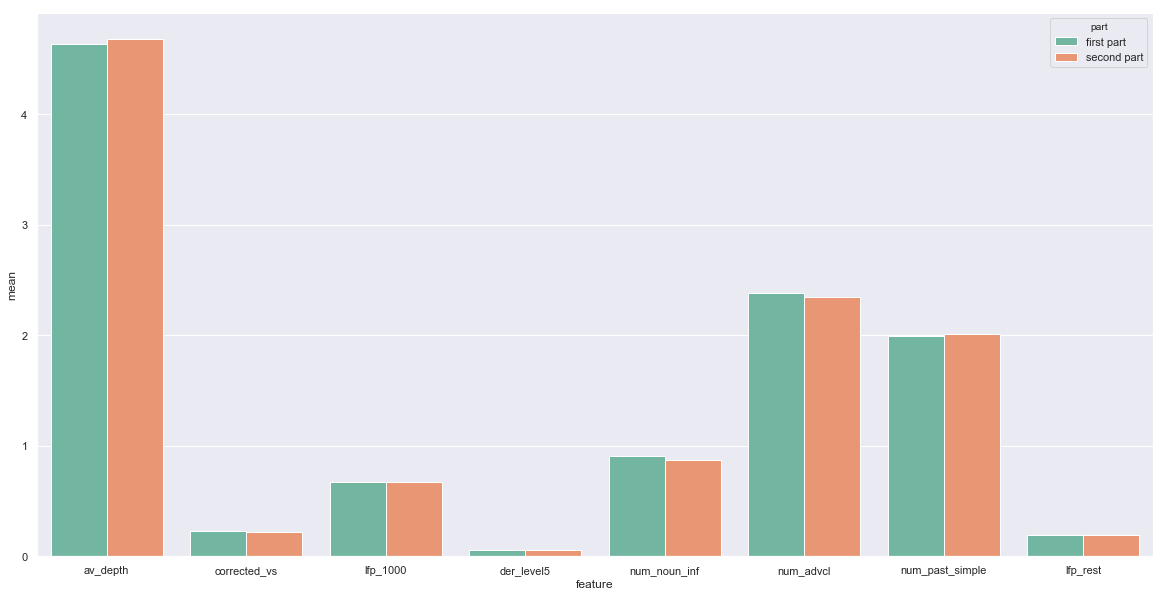

In [14]:
sns.set(rc={'figure.figsize':(20,10)})
sns_plt = sns.barplot(x="feature", y="mean", hue="part", data=no_diff_graph, palette="Set2")
sns_plt.figure.savefig('/Users/ira/Downloads/REALEC_Inspector/graphs/part_difference/no_difference.png')

# Difference

In [15]:
diff = f_df_anova[f_df_anova['p-value'] < 0.05]
diff.head()

,F-value,p-value,partial eta-square,first part,second part,group
feature,,,,,,
num_poss,831.209,0.0,0.108,8.612,6.190,syntactic
num_sent,796.005,0.0,0.104,7.036,5.479,syntactic
lv,646.380,0.0,0.086,0.559,0.604,lexical
num_tok,642.133,0.0,0.085,141.441,115.540,syntactic
num_tu,534.080,0.0,0.072,8.810,6.841,syntactic


In [16]:
diff_graph = diff
diff_graph['feature'] = diff_graph.index
diff_graph = diff_graph[['first part', 'second part', "feature", 'group']]

In [17]:
diff_graph.head()

,first part,second part,feature,group
feature,,,,
num_poss,8.612,6.190,num_poss,syntactic
num_sent,7.036,5.479,num_sent,syntactic
lv,0.559,0.604,lv,lexical
num_tok,141.441,115.540,num_tok,syntactic
num_tu,8.810,6.841,num_tu,syntactic


## Lexical

In [18]:
diff_graph_lex = diff_graph[diff_graph['group'] == 'lexical']
diff_graph_lex = diff_graph_lex.drop(['group'], axis=1)
diff_graph_lex = pd.melt(diff_graph_lex, id_vars="feature", var_name="part", value_name="mean")
diff_graph_lex.head()

,feature,part,mean
0,lv,first part,0.559
1,ndw,first part,77.939
2,modv,first part,0.228
3,advv,first part,0.092
4,corrected_ttr,first part,4.616


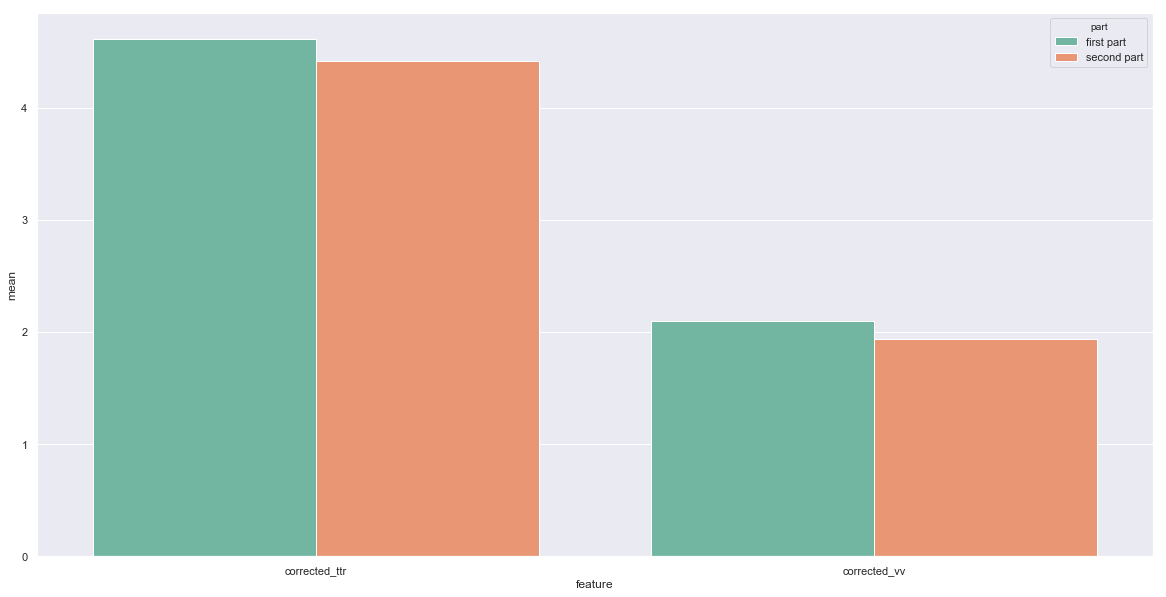

In [19]:
_diff_graph_lex = diff_graph_lex[diff_graph_lex['feature'].isin(['corrected_vv', 'corrected_ttr'])]
sns_plt = sns.barplot(x="feature", y="mean", hue="part", data=_diff_graph_lex, palette="Set2")
sns_plt.figure.savefig('/Users/ira/Downloads/REALEC_Inspector/graphs/part_difference/difference_vv_ttr.png')

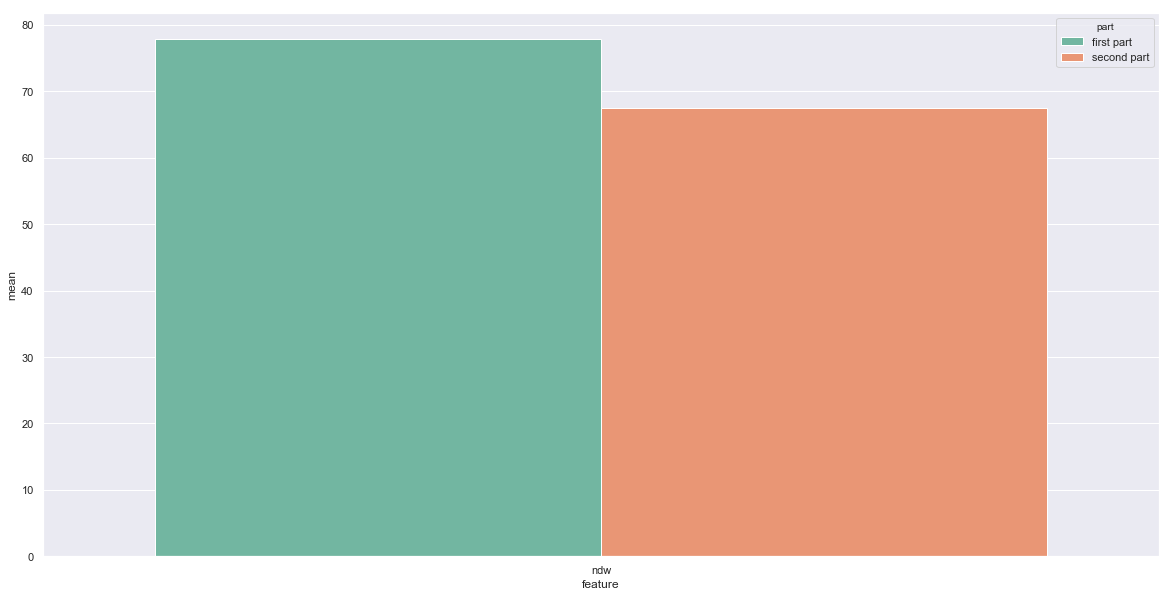

In [20]:
_diff_graph_lex = diff_graph_lex[diff_graph_lex['feature'].isin(['ndw'])]
sns.set(rc={'figure.figsize':(20,10)})
sns_plt = sns.barplot(x="feature", y="mean", hue="part", data=_diff_graph_lex, palette="Set2")
sns_plt.figure.savefig('/Users/ira/Downloads/REALEC_Inspector/graphs/part_difference/difference_ndw.png')

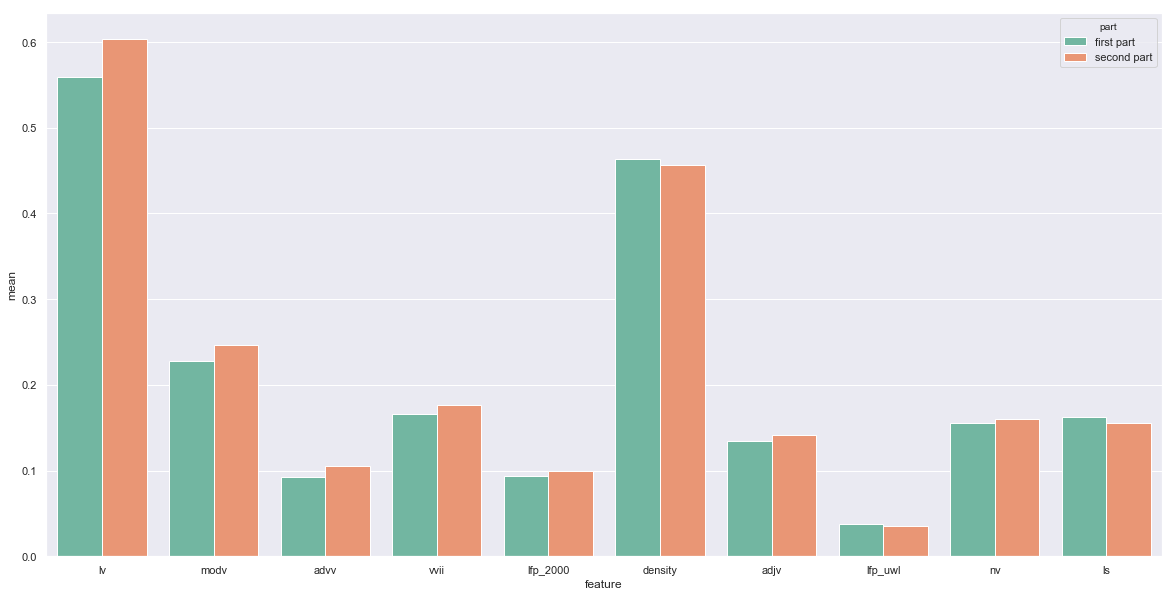

In [21]:
_diff_graph_lex = diff_graph_lex[diff_graph_lex['feature'] != 'ndw']
_diff_graph_lex = _diff_graph_lex[diff_graph_lex['feature'] != 'corrected_vv']
_diff_graph_lex = _diff_graph_lex[diff_graph_lex['feature'] != 'corrected_ttr']
sns.set(rc={'figure.figsize':(20,10)})
sns_plt = sns.barplot(x="feature", y="mean", hue="part", data=_diff_graph_lex, palette="Set2")
sns_plt.figure.savefig('/Users/ira/Downloads/REALEC_Inspector/graphs/part_difference/difference_rest_lex.png')

## Morhological

In [22]:
diff_graph_lex = diff_graph[diff_graph['group'] == 'morphological']
diff_graph_lex = diff_graph_lex.drop(['group'], axis=1)
diff_graph_lex = pd.melt(diff_graph_lex, id_vars="feature", var_name="part", value_name="mean")
diff_graph_lex.head()

,feature,part,mean
0,num_pres_sing,first part,4.299
1,mci,first part,2.867
2,num_past_part,first part,2.573
3,freq_finite_forms,first part,0.443
4,der_level6,first part,0.038


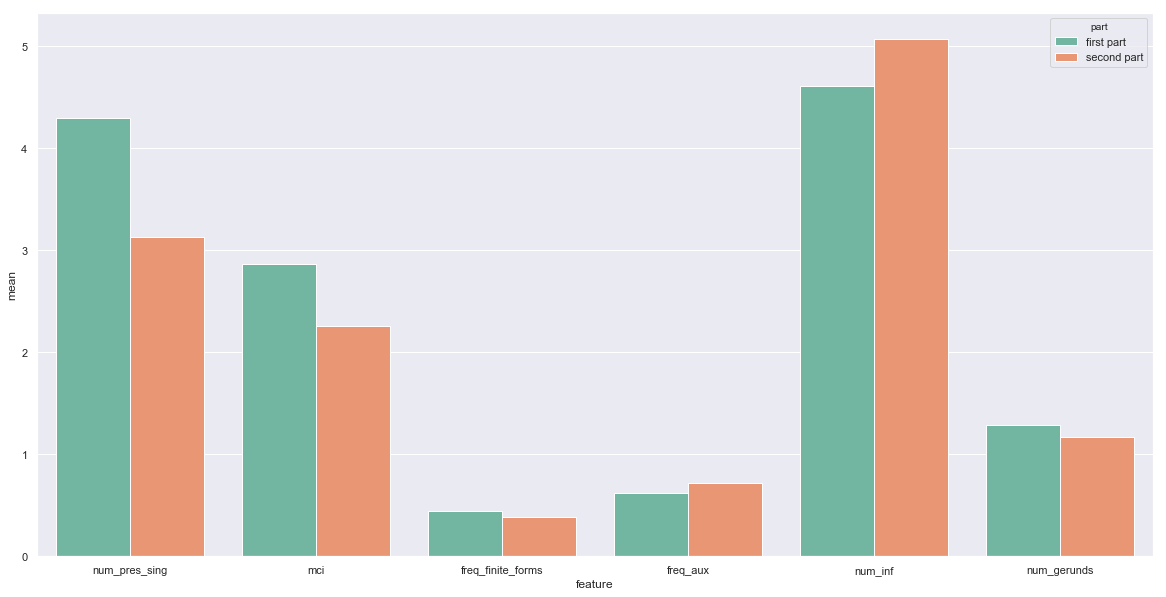

In [23]:
_diff_graph_lex = diff_graph_lex[diff_graph_lex['feature'].isin(['num_inf', 'num_gerunds',
                                                                 'num_pres_sing', 'num_past_simple',
                                                                 'mci', 'freq_aux', 'freq_finite_forms'])]
sns.set(rc={'figure.figsize':(20,10)})
sns_plt = sns.barplot(x="feature", y="mean", hue="part", data=_diff_graph_lex, palette="Set2")
sns_plt.figure.savefig('/Users/ira/Downloads/REALEC_Inspector/graphs/part_difference/difference_rest_morph_1.png')

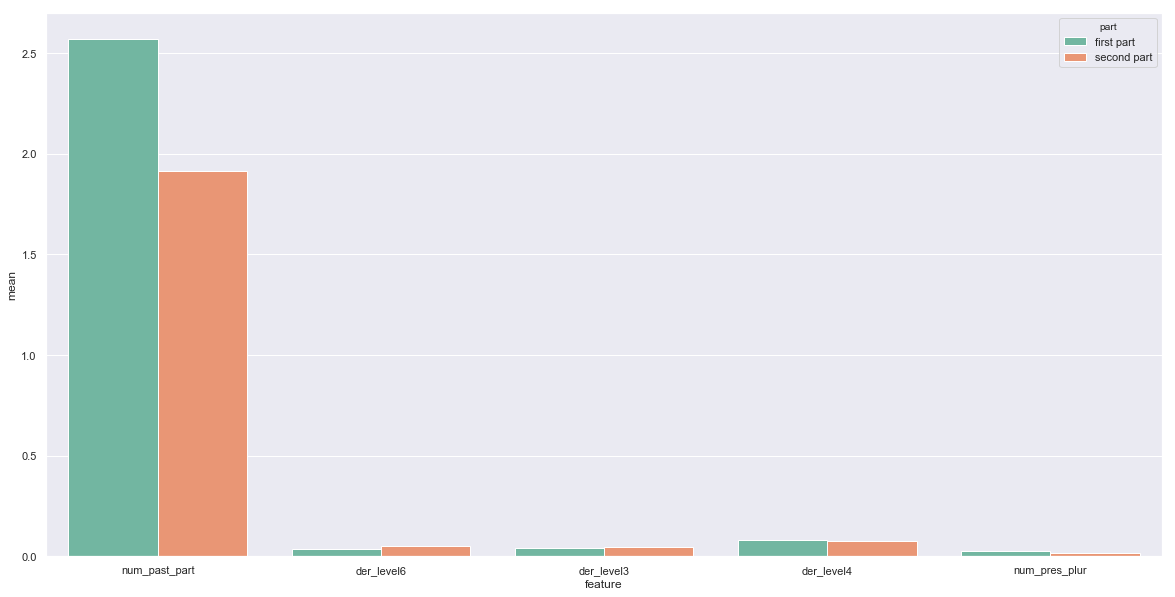

In [24]:
_diff_graph_lex = diff_graph_lex[~diff_graph_lex['feature'].isin(['num_inf', 'num_gerunds',
                                                                 'num_pres_sing', 'num_past_simple',
                                                                 'mci', 'freq_aux', 'freq_finite_forms'])]
sns.set(rc={'figure.figsize':(20,10)})
sns_plt = sns.barplot(x="feature", y="mean", hue="part", data=_diff_graph_lex, palette="Set2")
sns_plt.figure.savefig('/Users/ira/Downloads/REALEC_Inspector/graphs/part_difference/difference_rest_morph_2.png')

## Syntactic

In [25]:
diff_graph_lex = diff_graph[diff_graph['group'] == 'syntactic']
diff_graph_lex = diff_graph_lex.drop(['group'], axis=1)
diff_graph_lex = pd.melt(diff_graph_lex, id_vars="feature", var_name="part", value_name="mean")
diff_graph_lex.head()

,feature,part,mean
0,num_poss,first part,8.612
1,num_sent,first part,7.036
2,num_tok,first part,141.441
3,num_tu,first part,8.810
4,num_adj_noun,first part,8.319


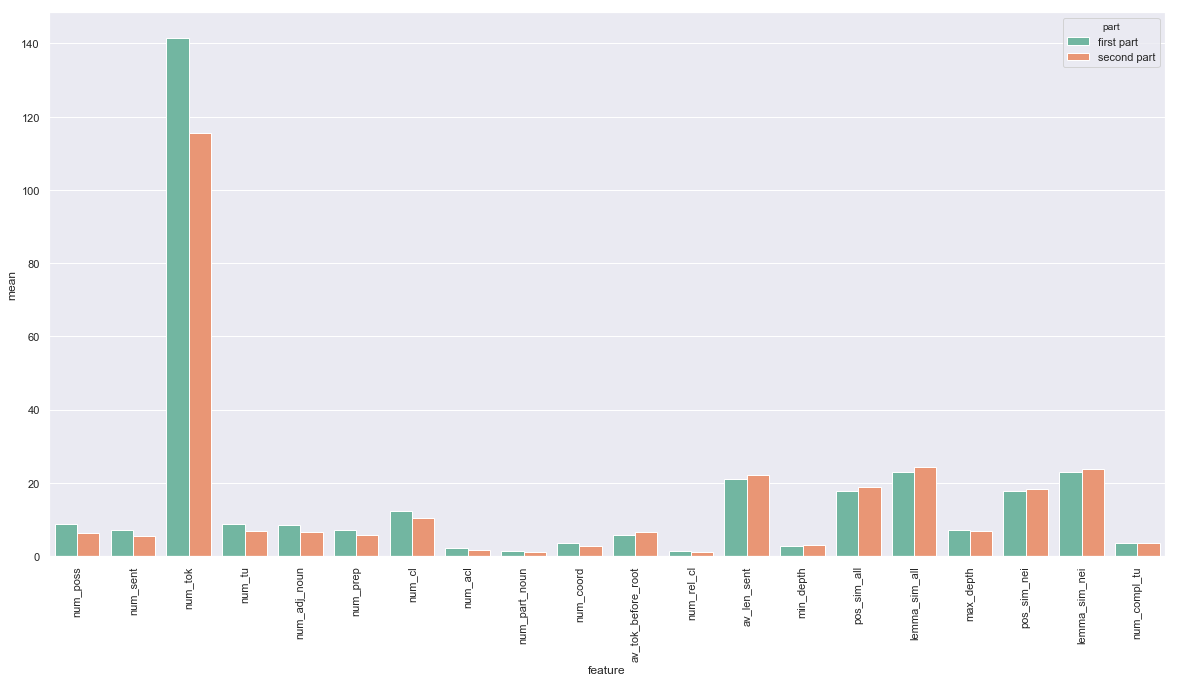

In [26]:
_diff_graph_lex = diff_graph_lex[~diff_graph_lex['feature'].isin(['num_inf', 'num_gerunds',
                                                                 'num_pres_sing', 'num_past_simple',
                                                                 'mci', 'freq_aux', 'freq_finite_forms'])]
sns.set(rc={'figure.figsize':(20,10)})
sns_plt = sns.barplot(x="feature", y="mean", hue="part", data=_diff_graph_lex, palette="Set2")
loc, labels = plt.xticks()
sns_plt.set_xticklabels(labels, rotation=90)
sns_plt.figure.savefig('/Users/ira/Downloads/REALEC_Inspector/graphs/part_difference/difference_syntactic.png')

## Discursive

In [27]:
diff_graph_lex = diff_graph[diff_graph['group'] == 'discursive']
diff_graph_lex = diff_graph_lex.drop(['group'], axis=1)
diff_graph_lex = pd.melt(diff_graph_lex, id_vars="feature", var_name="part", value_name="mean")
diff_graph_lex.head()

,feature,part,mean
0,num_linkings,first part,6.294
1,num_shell_noun,first part,1.100
2,num_4grams,first part,3.407
3,num_func_ngrams,first part,0.697
4,num_linkings,second part,5.503


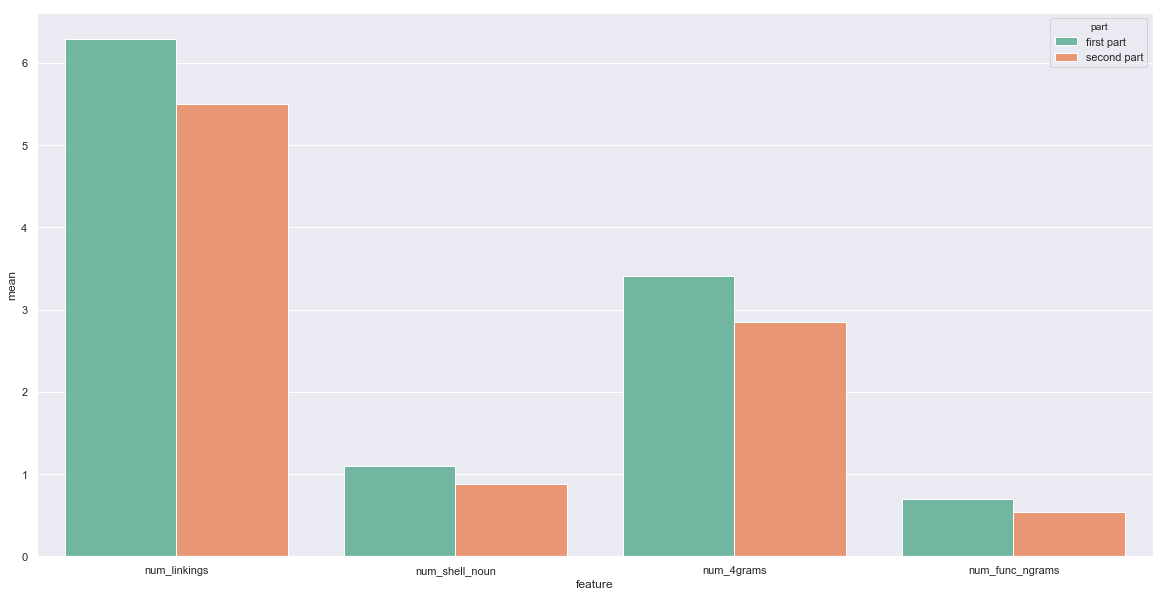

In [28]:
_diff_graph_lex = diff_graph_lex[~diff_graph_lex['feature'].isin(['num_inf', 'num_gerunds',
                                                                 'num_pres_sing', 'num_past_simple',
                                                                 'mci', 'freq_aux', 'freq_finite_forms'])]
sns.set(rc={'figure.figsize':(20,10)})
sns_plt = sns.barplot(x="feature", y="mean", hue="part", data=_diff_graph_lex, palette="Set2")
sns_plt.figure.savefig('/Users/ira/Downloads/REALEC_Inspector/graphs/part_difference/discursive.png')

## L1 Interference

In [29]:
diff_graph_lex = diff_graph[diff_graph['group'] == 'l1_interference']
diff_graph_lex = diff_graph_lex.drop(['group'], axis=1)
diff_graph_lex = pd.melt(diff_graph_lex, id_vars="feature", var_name="part", value_name="mean")
diff_graph_lex.head()

,feature,part,mean
0,num_misspelled_tokens,first part,1.579
1,million_mistake,first part,0.165
2,num_misspelled_tokens,second part,1.282
3,million_mistake,second part,0.094


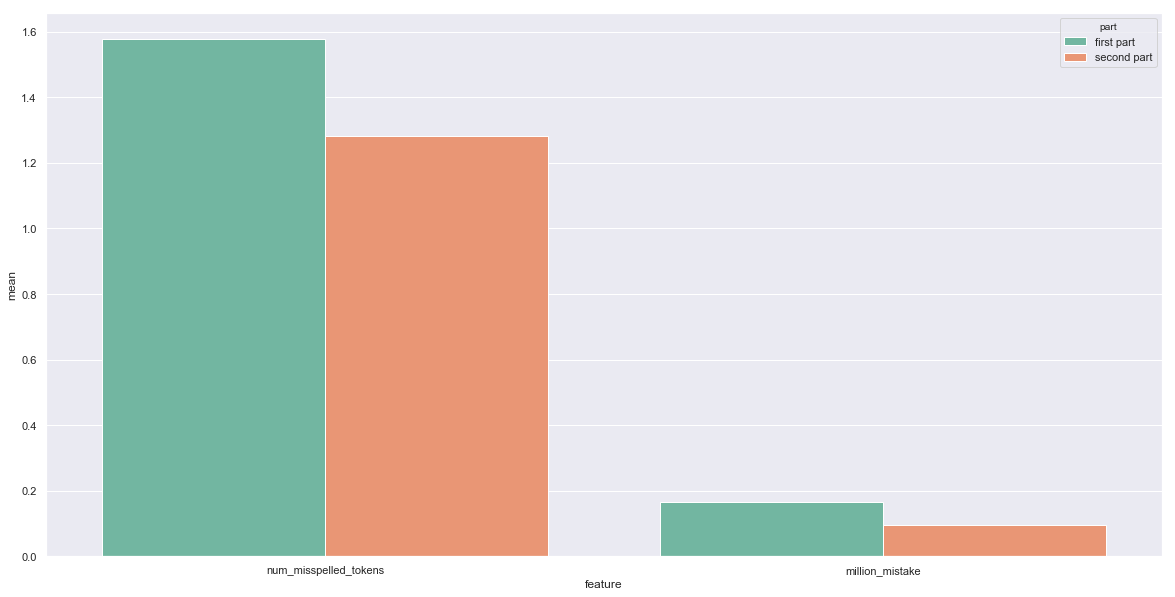

In [30]:
_diff_graph_lex = diff_graph_lex[~diff_graph_lex['feature'].isin(['num_inf', 'num_gerunds',
                                                                 'num_pres_sing', 'num_past_simple',
                                                                 'mci', 'freq_aux', 'freq_finite_forms'])]
sns.set(rc={'figure.figsize':(20,10)})
sns_plt = sns.barplot(x="feature", y="mean", hue="part", data=_diff_graph_lex, palette="Set2")
sns_plt.figure.savefig('/Users/ira/Downloads/REALEC_Inspector/graphs/part_difference/l1.png')